<a href="https://colab.research.google.com/github/Jinqiao-Li/SwissText2025_CleanTech/blob/main/phase1/patent_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cleantech Media Dataset:**

cleantech_media_dataset_v3_2024-10-28.csv
cleantech_rag_evaluation_data_2024-09-20.csv

https://www.kaggle.com/datasets/jannalipenkova/cleantech-media-dataset

**Cleantech Google Patent Dataset:**

CleanTech_22-24_updated.json

https://www.kaggle.com/datasets/prakharbhandari20/cleantech-google-patent-dataset?resource=download.

In [1]:
import kagglehub
import pandas as pd
import json
import matplotlib.pyplot as plt

# Media dataset

# Data collection and cleaning

In [39]:
# Download latest version
media_path = kagglehub.dataset_download("jannalipenkova/cleantech-media-dataset")
df = pd.read_csv(media_path + "/cleantech_media_dataset_v3_2024-10-28.csv")

In [41]:
df.shape

(20111, 7)

In [42]:
# Duplicates removement
df = df.drop_duplicates()

# Text preprocessing

# Explorative data analysis

## Domain

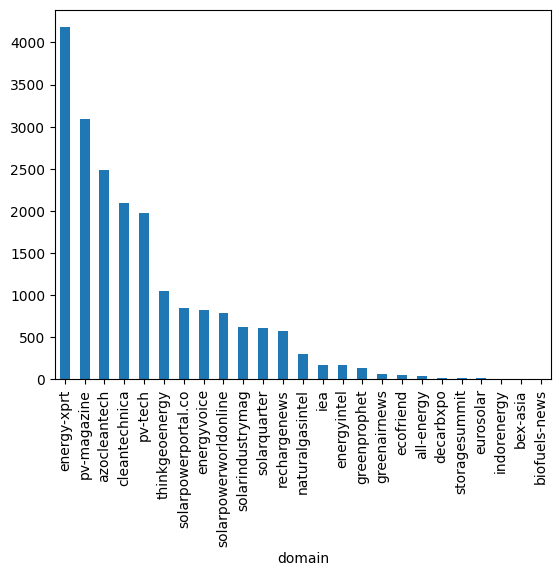

In [3]:
df.domain.value_counts().plot(kind="bar")
plt.show()

## date

In [9]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_month'] = df['date'].dt.strftime('%Y-%m')

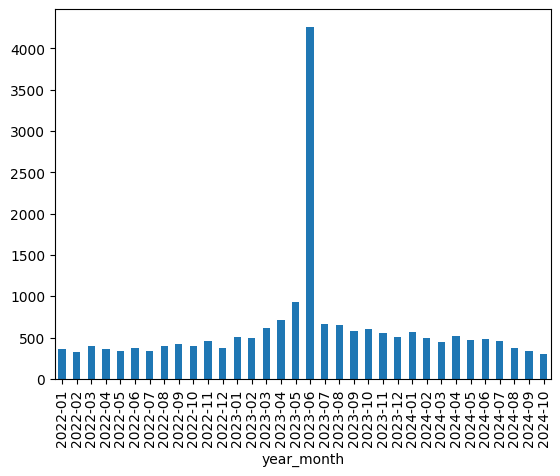

In [17]:
df['year_month'].value_counts().sort_index().plot(kind="bar")
plt.show()

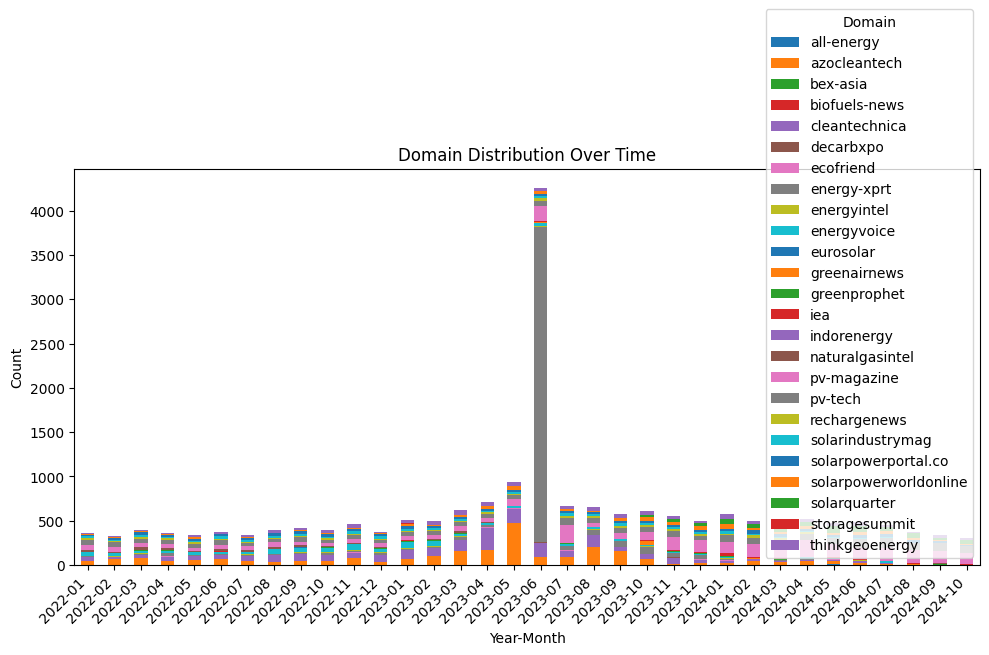

In [26]:

# Group data by year-month and domain, then count occurrences
grouped_data = df.groupby(['year_month', 'domain'])['domain'].count().unstack()

# Create the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Domain Distribution Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.legend(title='Domain')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

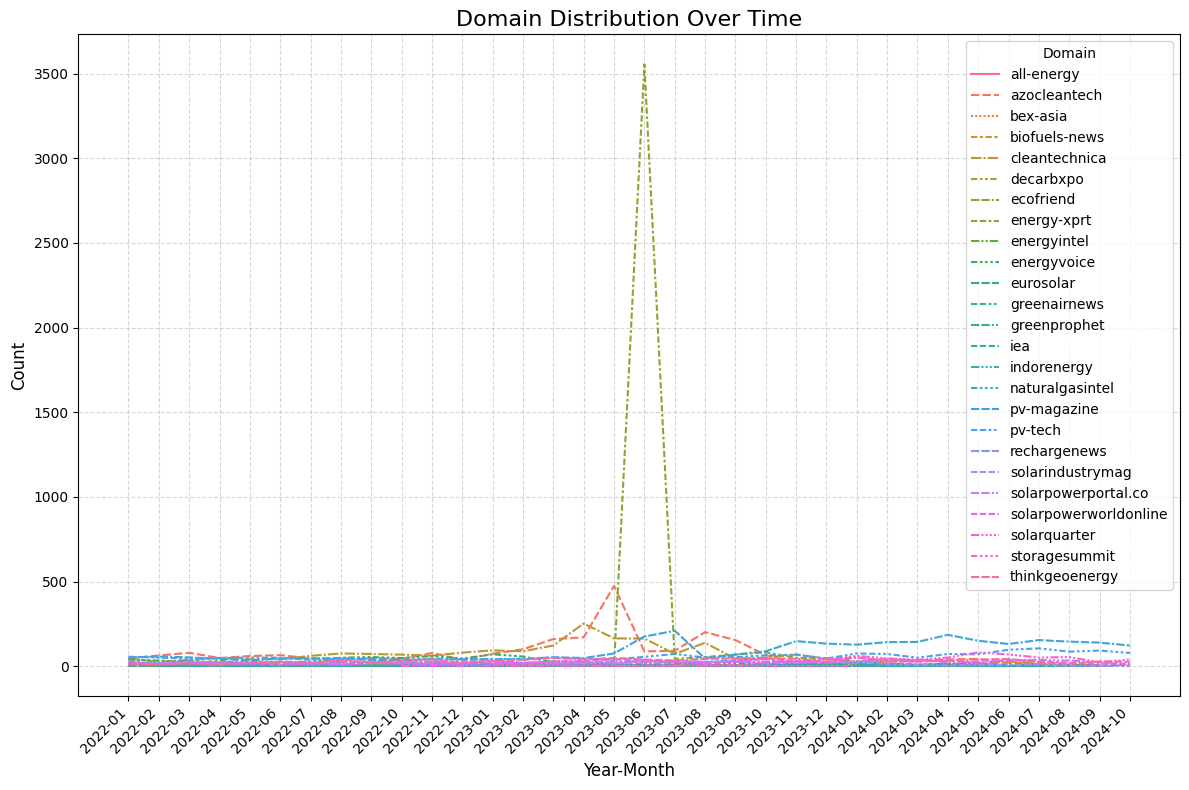

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
sns.lineplot(data=grouped_data)  # Use Seaborn for a cleaner look

plt.title('Domain Distribution Over Time', fontsize=16)  # Increase title font size
plt.xlabel('Year-Month', fontsize=12)  # Increase x-axis label font size
plt.ylabel('Count', fontsize=12)  # Increase y-axis label font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust x-axis ticks
plt.legend(title='Domain', fontsize=10)  # Adjust legend font size
plt.grid(True, linestyle='--', alpha=0.5)  # Add a subtle grid for better readability
plt.tight_layout()
plt.show()

## Content

In [33]:
lambda x: len(x.split())

635

<Axes: >

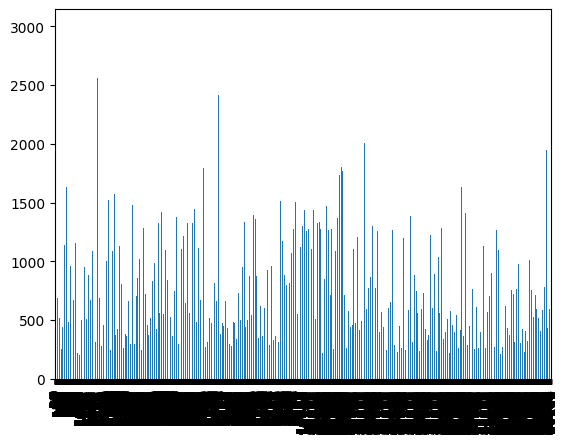

In [35]:
df['content_length'] = df['content'].apply(lambda x: len(x.split()))
df['content_length'].plot(kind='bar')

# Patent Data Visualization